# Data Analysis on Toxic Comments
**Empowering safer online dialogues: Predicting toxicity levels in user comments with precision and efficiency.**
<br>This project aims to develop a machine learning model to predict the toxicity level of user comments, focusing on online safety and mitigating unintended bias. The dataset, sourced from Kaggle, contains comments labeled with toxicity scores ranging from 0 to 1, along with identity attributes and metadata. The problem is framed as a regression task, with the goal of predicting toxicity levels accurately. Performance evaluation is based on ROC-AUC and Mean Squared Error metrics, reflecting both classification and regression aspects. Interpretability is not a requirement, but model efficiency is crucial for real-time prediction.

## Approach
<ul>

<li><b>Data Understanding and Preprocessing</b></li>
    <ul>
        <li>Explore the dataset structure, handle missing values, and understand the distribution of target variables.</li>
        <li>Preprocess text data by tokenization, removing stopwords, punctuation, and converting to lowercase.</li>
        <li>Encode categorical variables and extract additional features from identity attributes and metadata.
    </ul>

<li><b>Feature Engineering</b></li>
    <ul>
        <li>Extract features from text data using TF-IDF (Term-Frequency-Inverse Document Frequency) or CountVectorizer.</li>
        <li>Incorporate identity attributes and metadata as additional features.</li>
        <li>Explore dimensionality reduction techniques like TruncatedSVD or PCA if needed.</li>
    </ul>

<li><b>Model Selection and Training</b></li>
    <ul>
        <li>Select regression models such as Linear Regression, SVR, Decision Tree Regression, Random Forest, Regression, AdaBoost, Regression, and XGBoost Regression.</li>
        <li>Split the dataset into training and validation sets, and train the models using appropriate evaluation metrics.</li>
    </ul>
    
<li><b>Model Evaluation</b></li>
    <ul>
        <li>Evaluate model performance using ROC-AUC and Mean Squared Error metrics.</li>
        <li>Fine-tune hyperparameters and iterate model training to optimize performance.</li>
    </ul>

<li><b>Deployment and Optimization</b></li>
    <ul>
        <li>Deploy the trained model for inference, ensuring scalability and efficiency for real-time prediction.</li>
        <li>Optimize the model for speed and memory efficiency, considering techniques like model quantization, pruning, or using lightweight models.</li>
    </ul>
    
</ul>

## Importing Libraries and Reading data :

In [1]:
# Data analysis imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error

# Model imports
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('train.csv', index_col='id', engine='python')
train_data.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [3]:
test_data = pd.read_csv('test.csv', index_col='id', engine='python')
test_data.head()

,comment_text
id,
7097320,[ Integrity means that you pay your debts.]\n\...
7097321,This is malfeasance by the Administrator and t...
7097322,@Rmiller101 - Spoken like a true elitist. But ...
7097323,"Paul: Thank you for your kind words. I do, in..."
7097324,Sorry you missed high school. Eisenhower sent ...


In [4]:
train_data.describe()

,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,0.034393,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,0.167900,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1804874 entries, 59848 to 6334010
Data columns (total 44 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   target                               float64
 1   comment_text                         object 
 2   severe_toxicity                      float64
 3   obscene                              float64
 4   identity_attack                      float64
 5   insult                               float64
 6   threat                               float64
 7   asian                                float64
 8   atheist                              float64
 9   bisexual                             float64
 10  black                                float64
 11  buddhist                             float64
 12  christian                            float64
 13  female                               float64
 14  heterosexual                         float64
 15  hindu                       

In [6]:
train_data.isnull().sum()

target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male                                   1399744
muslim       

In [7]:
print("Train and test shape: {} {}".format(train_data.shape, test_data.shape))

Train and test shape: (1804874, 44) (97320, 1)


## Analysing Features :

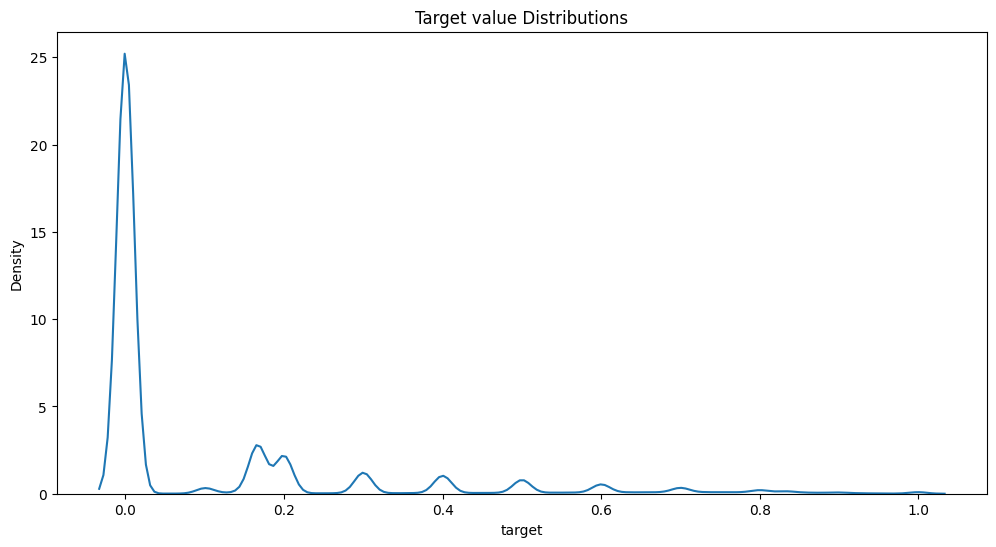

In [8]:
plt.figure(figsize=(12,6))
plt.title("Target value Distributions")
sns.distplot(train_data['target'], kde=True, hist=False, bins=240, label='target')
plt.show()

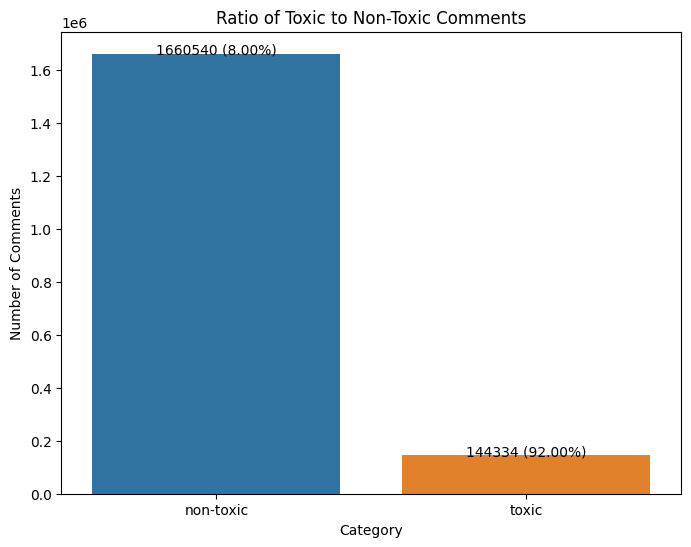

In [9]:
# Setting target column based on toxicity rating threshold
train_data['target_category'] = train_data['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")

# Count the types of comments
comment_counts = train_data['target_category'].value_counts()

# Calculate the percentage of toxic and non-toxic comments
toxic_percentage = (comment_counts['toxic'] / comment_counts.sum()) * 100
non_toxic_percentage = (comment_counts['non-toxic'] / comment_counts.sum()) * 100

# Plot the ratio of toxic to non-toxic comments
plt.figure(figsize=(8, 6))
sns.barplot(x=comment_counts.index, y=comment_counts.values)
plt.title("Ratio of Toxic to Non-Toxic Comments")
plt.ylabel("Number of Comments")
plt.xlabel("Category")

# Add text annotations for percentage on the bars
for i, count in enumerate(comment_counts.values):
    plt.text(i, count + 0.5, f'{count} ({toxic_percentage if i == 0 else non_toxic_percentage:.2f}%)', ha='center')

plt.show()



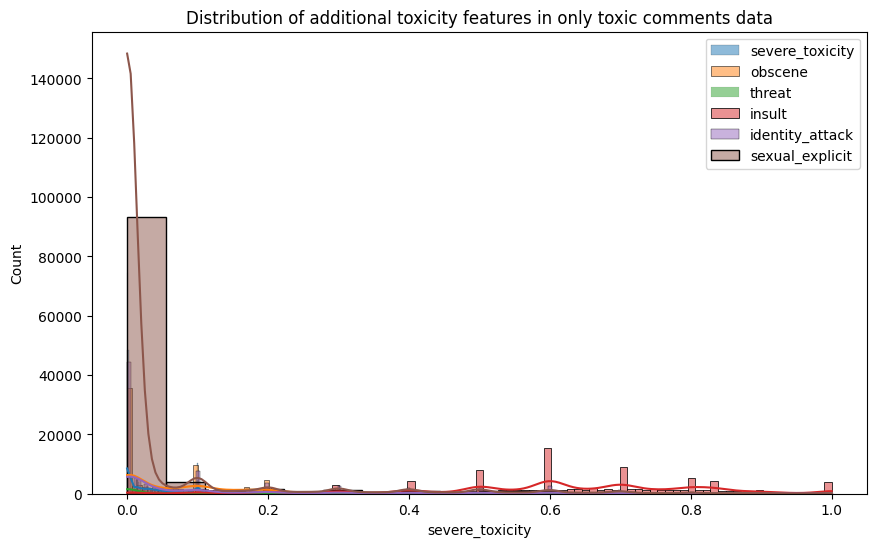

In [10]:
features = ['severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']

# Define the function to plot the distribution of features
def plot_features_distribution(features, title, data):
    fig, ax = plt.subplots(figsize=(10, 6))
    for feature in features:
        sns.histplot(data[feature], kde=True, ax=ax, label=feature)
    ax.set_title(title)
    ax.legend()
    plt.show()

# Looking at the distribution of additional toxicity features on the comments that are actually considered toxic:
temp = train_data[train_data['target'] > 0.5]
plot_features_distribution(features, "Distribution of additional toxicity features in only toxic comments data", temp)

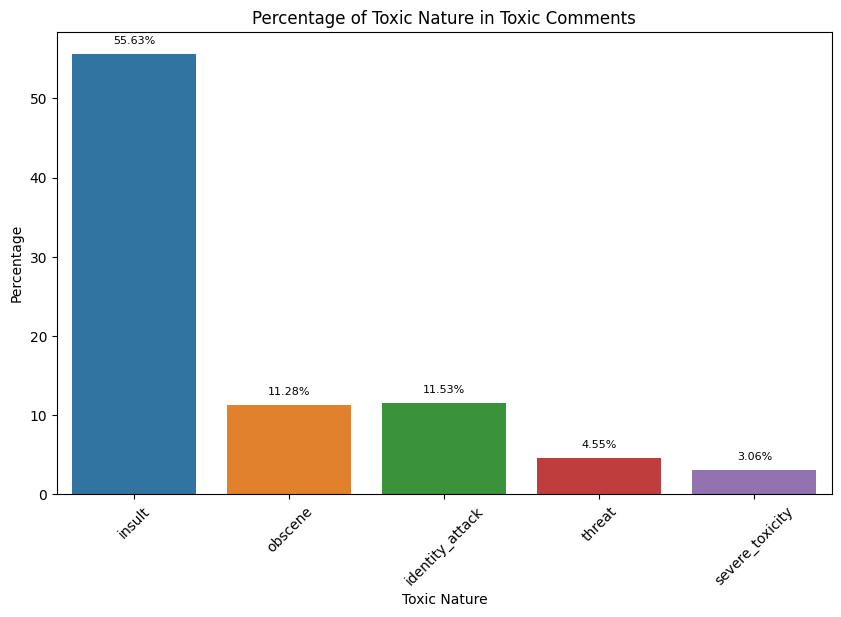

In [11]:
# Filter toxic comments data
toxic_comments = train_data[train_data['target_category'] == 'toxic']

# Calculate the percentage of each toxic nature
toxic_nature_percentages = {}
for column in ['insult', 'obscene', 'identity_attack', 'threat', 'severe_toxicity']:
    percentage = (toxic_comments[column].sum() / toxic_comments.shape[0]) * 100
    toxic_nature_percentages[column] = percentage

# Plot the percentage of each toxic nature
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(toxic_nature_percentages.keys()), y=list(toxic_nature_percentages.values()))
plt.title("Percentage of Toxic Nature in Toxic Comments")
plt.xlabel("Toxic Nature")
plt.ylabel("Percentage")
plt.xticks(rotation=45)

# Add percentage values on top of the bars
for i, v in enumerate(list(toxic_nature_percentages.values())):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()


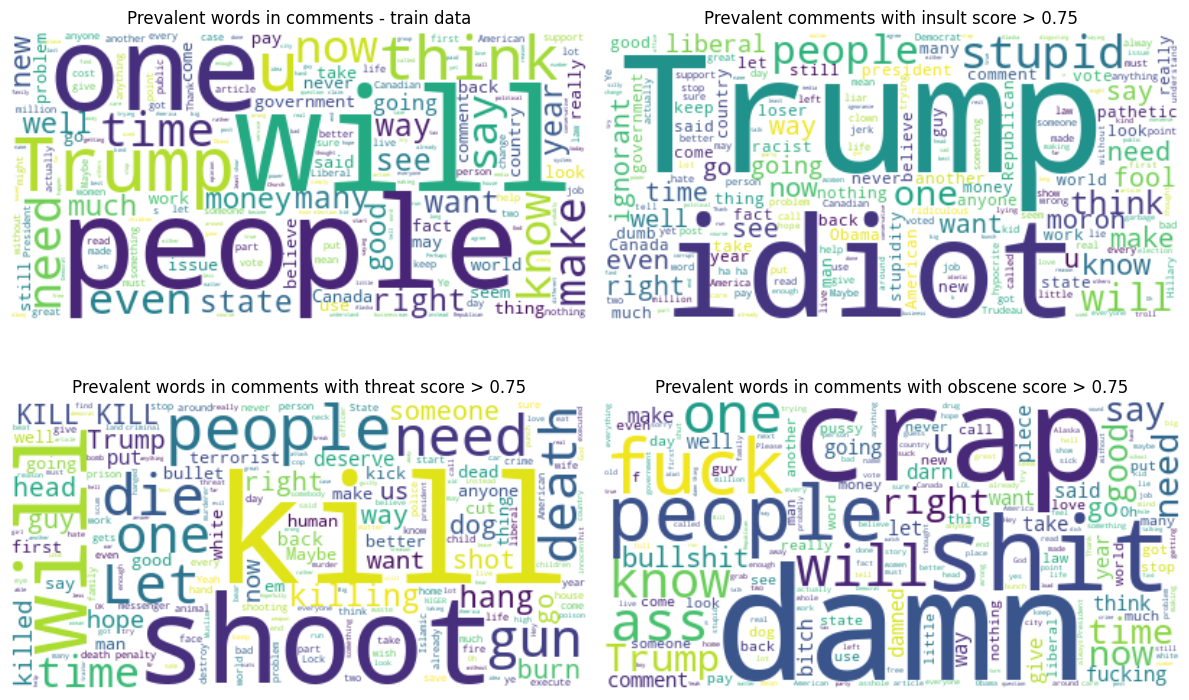

In [12]:
def show_wordcloud(text, title, ax):
    wordcloud = WordCloud(width=400, height=200, background_color='white', max_words=200).generate(' '.join(text))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Word cloud for a sample of comments from the entire dataset
show_wordcloud(train_data['comment_text'].sample(20000), title='Prevalent words in comments - train data', ax=axes[0, 0])
show_wordcloud(train_data.loc[train_data['insult'] > 0.75]['comment_text'].sample(20000), title='Prevalent comments with insult score > 0.75', ax=axes[0, 1])
show_wordcloud(train_data.loc[train_data['threat'] > 0.75]['comment_text'], title='Prevalent words in comments with threat score > 0.75', ax=axes[1, 0])
show_wordcloud(train_data.loc[train_data['obscene'] > 0.75]['comment_text'], title='Prevalent words in comments with obscene score > 0.75', ax=axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

def preprocess(text_string):
    text_string = text_string.lower()  # Convert to lowercase
    text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string)  # Remove special characters and punctuations
    new_text = [stemmer.stem(word) for word in text_string.split() if word not in stop_words]  # Stemming and remove stopwords
    return ' '.join(new_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hnnai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
train_data_subset = train_data.head(100000)

# Apply preprocessing to the 'comment_text' column of the subset
train_data_subset['preprocessed_text'] = train_data_subset['comment_text'].apply(preprocess)

In [29]:
train_data_subset.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,target_category,preprocessed_text
id,,,,,,,,,,,,,,,,,,,,,
59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0.0,0,4,non-toxic,cool like would want mother read realli great ...
59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0.0,0,4,non-toxic,thank would make life lot less anxieti induc k...
59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0.0,0,4,non-toxic,urgent design problem kudo take impress
59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0.0,0,4,non-toxic,someth abl instal site releas
59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0.0,4,47,toxic,haha guy bunch loser


In [30]:
test_data['preprocessed_text'] = test_data['comment_text'].apply(preprocess)

In [31]:
test_data

,comment_text,preprocessed_text
id,,
7097320,[ Integrity means that you pay your debts.]\n\...,integr mean pay debt appli presid trump
7097321,This is malfeasance by the Administrator and t...,malfeas administr board wast money
7097322,@Rmiller101 - Spoken like a true elitist. But ...,rmiller101 spoken like true elitist look bud a...
7097323,"Paul: Thank you for your kind words. I do, in...",paul thank kind word inde strong belief hide b...
7097324,Sorry you missed high school. Eisenhower sent ...,sorri miss high school eisenhow sent troop vie...
...,...,...
7194635,He should lose his job for promoting mis-infor...,lose job promot mis inform harm student
7194636,"""Thinning project is meant to lower fire dange...",thin project meant lower fire danger improv wi...
7194637,I hope you millennials are happy that you put ...,hope millenni happi put airhead charg


In [32]:
feature = train_data_subset[['preprocessed_text']]
output = train_data_subset[['target']]
X_test = test_data[['preprocessed_text']]
X_train, X_cv, y_train, y_cv = train_test_split(feature, output)

print(X_train.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(75000, 1)
(25000, 1)
(75000, 1)
(25000, 1)


In [33]:
X_train.to_pickle('X_train.pkl')
X_cv.to_pickle('X_cv.pkl')
X_test.to_pickle('X_test.pkl')
y_train.to_pickle('y_train.pkl')
y_cv.to_pickle('y_cv.pkl')

In [34]:
cnt_vec = CountVectorizer(ngram_range=(1,2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['preprocessed_text'])
bow_cv = cnt_vec.transform(X_cv['preprocessed_text'])
bow_test = cnt_vec.transform(X_test['preprocessed_text'])

print(bow_train.shape)
print(bow_cv.shape)
print(bow_test.shape)

(75000, 30000)
(25000, 30000)
(97320, 30000)


In [35]:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['target'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_cv['target'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.021578067512279753
Mean Squared Error on cv set:  0.02229122130933796
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.020862885381069993
Mean Squared Error on cv set:  0.022307238128292193
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.023277279987206276
Mean Squared Error on cv set:  0.02297644474169279
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.020908627479649007
Mean Squared Error on cv set:  0.022326068156731552
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.028980020555088824
Mean Squared Error on cv set:  0.028220815515458516
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.02131868586769603
Mean Squared Error on cv set:  0.02257836294726543
***************************************

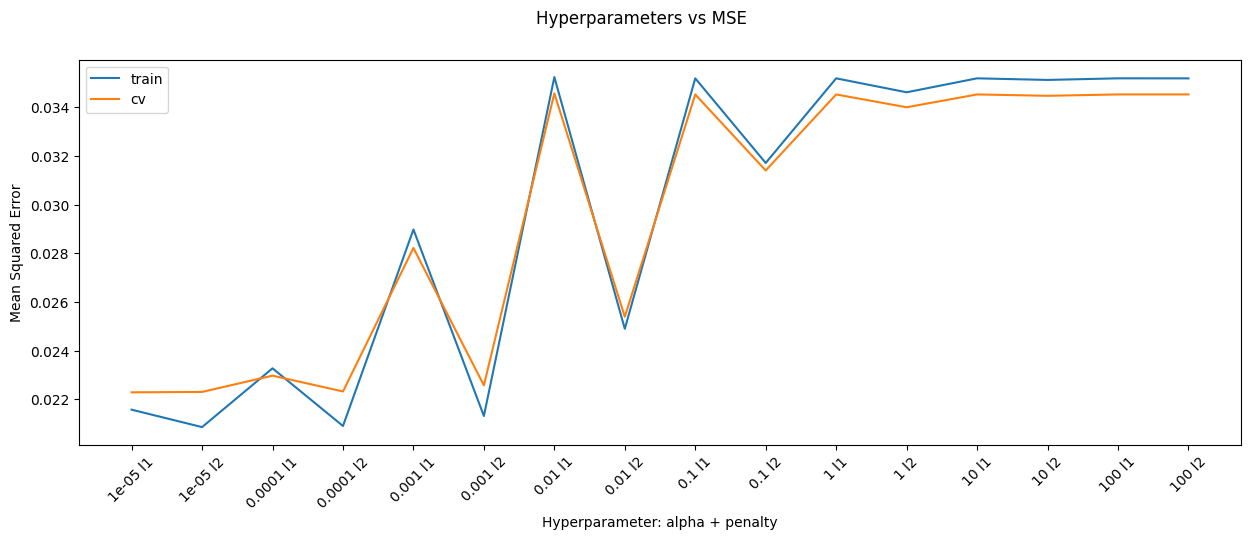

In [36]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(alpha) * len(penalty)), tr_errors)
plt.plot(range(len(alpha) * len(penalty)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(alpha) * len(penalty)), xticks, rotation=45)
plt.xlabel('Hyperparameter: alpha + penalty')
plt.ylabel('Mean Squared Error')
plt.show()

In [37]:
best_model.get_params()

{'alpha': 1e-05,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}